# DS 3000 - Assignment 04

**Student Name**: Matthew Tong

**Date**: 2/1/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

(0 pts) Load the data directly from the url into a dataframe. Here is the link to the data: https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

programdata_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO')

## Question 2: 

(5 pts) Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed) and perform at least one additional data preparation step. 


In [5]:
programdata_df.info() # shows all variables and their types

programdata_df['County of Program Location'] = programdata_df['County of Program Location'].astype('category')
programdata_df['Program Category'] = programdata_df['Program Category'].astype('category')
programdata_df['Service Type'] = programdata_df['Service Type'].astype('category')
programdata_df['Age Group'] = programdata_df['Age Group'].astype('category')
programdata_df['Primary Substance Group'] = programdata_df['Primary Substance Group'].astype('category')

programdata_df.head() # shows the first ten rows of data
programdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99367 entries, 0 to 99366
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        99367 non-null  int64 
 1   County of Program Location  99367 non-null  object
 2   Program Category            99367 non-null  object
 3   Service Type                99367 non-null  object
 4   Age Group                   99367 non-null  object
 5   Primary Substance Group     99366 non-null  object
 6   Admissions                  99367 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99367 entries, 0 to 99366
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Year                        99367 non-null  int64   
 1   County of Program Location  99367 non-null  categor

Not all variables were represented in their expected type. According to the dictionary provided, "Year" and "Admissions" were represented accordingly. However, "County of Program Location", "Program Category", "Service Type", "Age Group", and "Primary Substance Group" were incorrectly represented. The data type stated in the dictionary was "text", but they are all categorical types so I changed all five of them to "category". 

In [7]:
print(programdata_df.isnull().sum())# checked the data for any empty data 
print(programdata_df[programdata_df['Primary Substance Group'].isnull()]) # searched the dataframe for the null row

print("The most frequency value in Primary Substance Group is", programdata_df['Primary Substance Group'].mode()[0]) # gets the most frequent value in the "Primary Substance Group" column
programdata_df.at[5836, 'Primary Substance Group'] = 'Alcohol'

programdata_df.isnull().sum() # check the data again for any empty data 

Year                          0
County of Program Location    0
Program Category              0
Service Type                  0
Age Group                     0
Primary Substance Group       1
Admissions                    0
dtype: int64
      Year County of Program Location Program Category           Service Type  \
5836  2007                   Sullivan      Residential  Intensive Residential   

     Age Group Primary Substance Group  Admissions  
5836  Under 18                     NaN           1  
The most frequency value in Primary Substance Group is Alcohol


Year                          0
County of Program Location    0
Program Category              0
Service Type                  0
Age Group                     0
Primary Substance Group       0
Admissions                    0
dtype: int64

For additional data preparation, I checked to see if there was any missing data. Since missing values is not a widespread issue in this dataset and it was just one box of empty data, imputation was performed. The missing value was changed to the most frequest value in the "Primary Substance Group" column, which is alcohol. 

## Question 3: 

(10 pts) Visualize the distribution of Age Groups, Program Category, Primary Substance Group, and Admissions. Ensure that you 1) choose an appropriate graph based on the type of data, and 2) use the appropriate function to aggregate the data. Explain each chart.


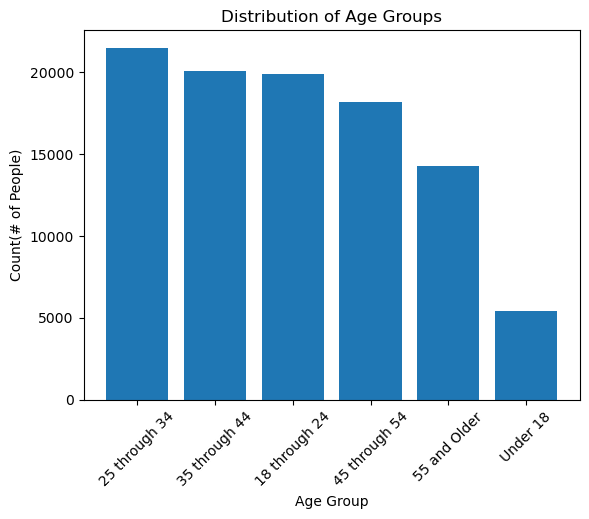

In [10]:
plt.bar(programdata_df['Age Group'].value_counts().index, programdata_df['Age Group'].value_counts().values)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count(# of People)')
plt.xticks(rotation=45) 

plt.show()

This bar chart shows the distribution of age groups and the count for each age group. The x-axis is the categories of age groups, while the y-axis is the amount of each category. The chart goes from highest count to lowest. I used a bar plot because they are useful when analyzing categorical data and show counts/percentages for each category which is exactly what the age group category represents. 

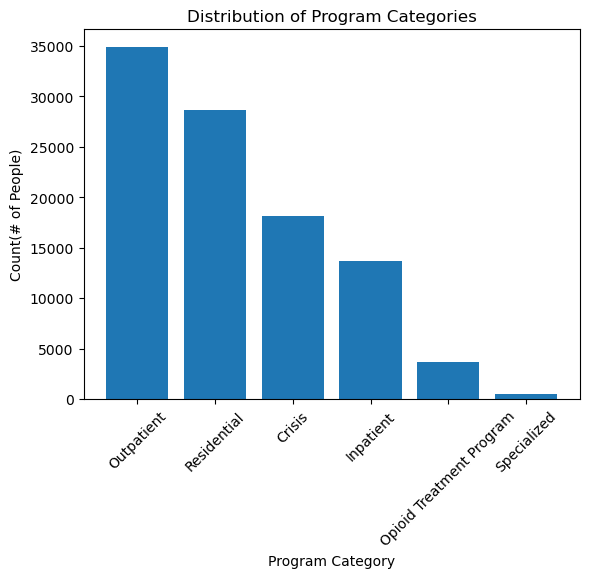

In [12]:
plt.bar(programdata_df['Program Category'].value_counts().index, programdata_df['Program Category'].value_counts().values)
plt.title('Distribution of Program Categories')
plt.xlabel('Program Category')
plt.ylabel('Count(# of People)')
plt.xticks(rotation=45) 

plt.show()

This bar chart shows the distribution of program categories and the count for each program category. The x-axis represents each program category, while the y-axis represents the count/amount for each program category. The chart goes from highest count to lowest count. I used a bar plot because they are useful when analyzing categorical data and show counts/percentages for each category which is exactly what the program category represents. 

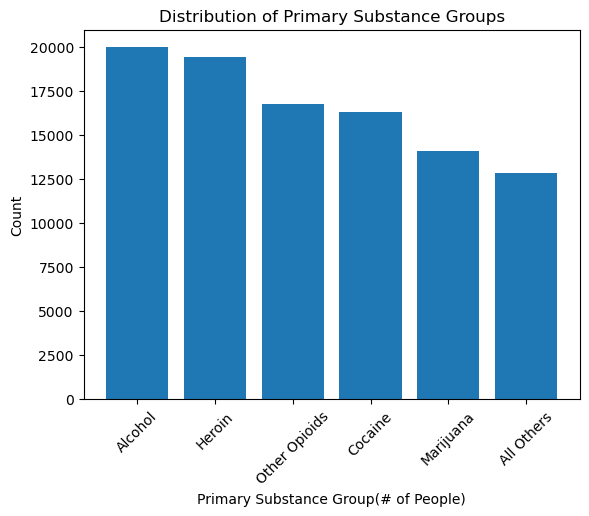

In [14]:
plt.bar(programdata_df['Primary Substance Group'].value_counts().index, programdata_df['Primary Substance Group'].value_counts().values)
plt.title('Distribution of Primary Substance Groups')
plt.xlabel('Primary Substance Group(# of People)')
plt.ylabel('Count')
plt.xticks(rotation=45) 

plt.show()

This bar chart shows the distribution of primary substance groups and the count for each primary substance group. The x-axis represents each primary substance group, while the y-axis represents the count/amount for each primary substance group. The chart is sorted from highest count to lowest count. I used a bar plot because they are useful when analyzing categorical data and show counts/percentages for each category which is exactly what the primary substance group category represents. 

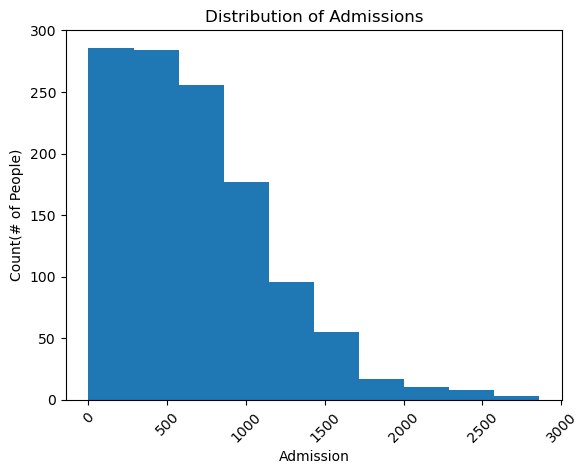

In [16]:
plt.hist(programdata_df['Admissions'].value_counts().index)
plt.title('Distribution of Admissions')
plt.xlabel('Admission')
plt.ylabel('Count(# of People)')
plt.xticks(rotation=45) 

plt.show()

This bar chart shows the distribution of primary substance groups and the count for each primary substance group. The x-axis represents each primary substance group, while the y-axis represents the count/amount for each primary substance group. The chart is sorted from highest count to lowest count. I used a bar plot because they are useful when analyzing categorical data and show counts/percentages for each category which is exactly what the primary substance group category represents. 

This histogram shows the distribution of admissions and the count for each admission. The x-axis represents the admission amount and the y-axis represents the count for each admission amount. The chart is not sorted from highest to lowest but is sorted by admission # in increasing order. I used a histogram because they are used for visualizing the distribution of continuous variables, which is what the admission category is.  

## Question 4: 

(5 pts) Develop a function named annualAdmissions(). This function will calculate the total reported admissions each year across the entire state of New York. Subsequently, display the results using a line chart and annotate the chart to indicate the year with the highest number of admissions.
After which, Execute the function in a new cell. Explain the chart and discuss any patterns or trends that you have observed.


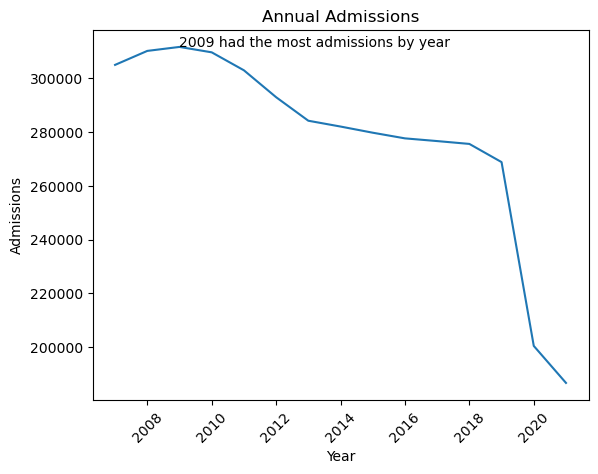

In [19]:
def annualAdmissions(df): 
    annual_totals = df.groupby('Year')['Admissions'].sum() # gets the totals for each year
    highest_year = annual_totals.idxmax()
    highest_admissions = annual_totals.max()
    #print(annual_totals)

    plt.plot(annual_totals.index, annual_totals.values)
    plt.title('Annual Admissions')
    plt.xlabel('Year')
    plt.ylabel('Admissions')
    plt.xticks(rotation=45)
    plt.annotate("2009 had the most admissions by year", xy=(highest_year, highest_admissions))

annualAdmissions(programdata_df)

The year with the highest number of admissions was 2009. 

This Line Plot chart shows the trend of admissions by year. The x-axis represents each year of admissions, while the y-axis represents the count/amount of admissions for each year. The chart is sorted by year, in date order. 

A trend that I saw from the earliest year to roughly 2009 was that there was an increase in admissions, but then ever since 2009 and after, there has been a decrease up until the latest year, 2021. The decrease from 2009 to 2013 was steeper than 2013 to 2018. However, 2018 to the latest date had a very steep decline of annual admissions. 

## Question 5: 

(10 pts) Develop a function named annualAdmissionsByCounty(year). This function will take a year as input, filter the data to identify all admissions for that specific year, and calculate the proportion of admissions by county. For instance, if the year is 2007, the function should filter the data for the specific year and compute the admissions as follows: county A 75%, county B 20%, and county C 2.5%, etc. The results should be displayed using a bar chart that highlights the top 10 counties.
Execute the annualAdmissionsByCounty() function in a new code cell to visualize the data for the last 10 years within the data.
Analyze the results and discuss any patterns or trends observed over this period.


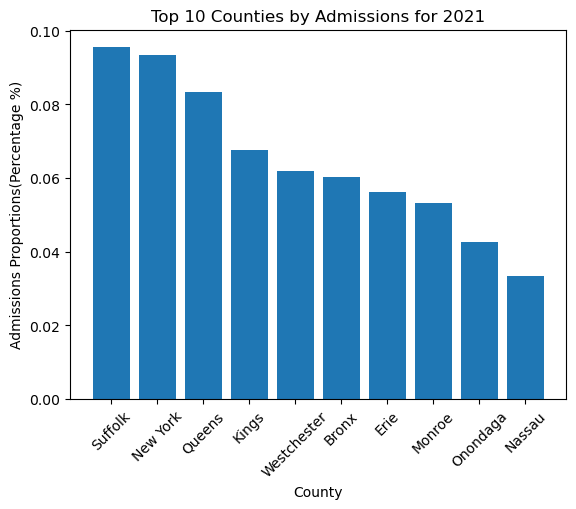

In [22]:
def annualAdmissionsByCounty(df, year): 
    year_data = df[df['Year'] == year] # gets the data for the provided year
    county_totals = year_data.groupby('County of Program Location', observed=False)['Admissions'].sum() # gets the totals for each county for provided year
    top_counties = (county_totals / county_totals.sum()).sort_values(ascending=False).head(10) # gets the top ten counties

    plt.bar(top_counties.index, top_counties.values)
    plt.title(f'Top 10 Counties by Admissions for {year}')
    plt.xlabel('County')
    plt.ylabel('Admissions Proportions(Percentage %)')
    plt.xticks(rotation=45)
    plt.show()

annualAdmissionsByCounty(programdata_df, 2021)

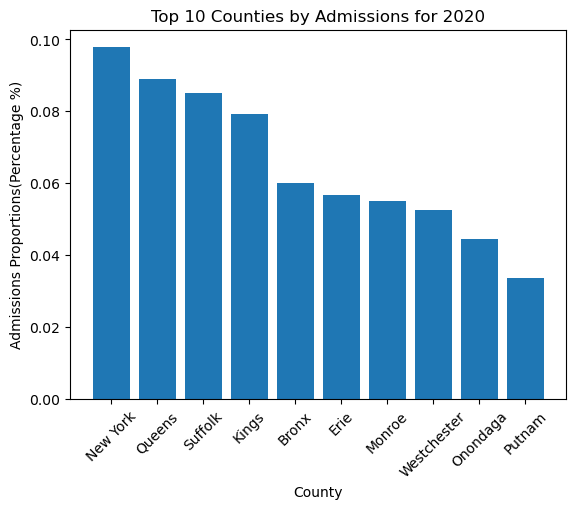

In [23]:
annualAdmissionsByCounty(programdata_df, 2020)

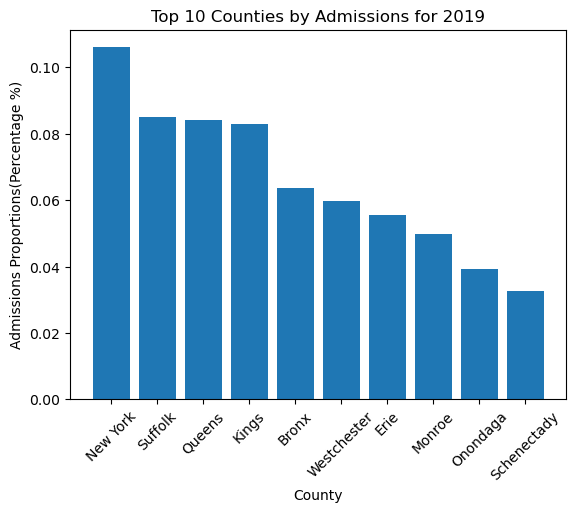

In [24]:
annualAdmissionsByCounty(programdata_df, 2019)

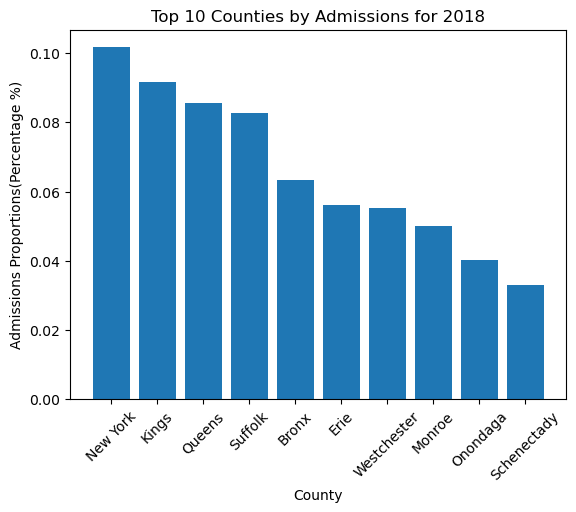

In [25]:
annualAdmissionsByCounty(programdata_df, 2018)

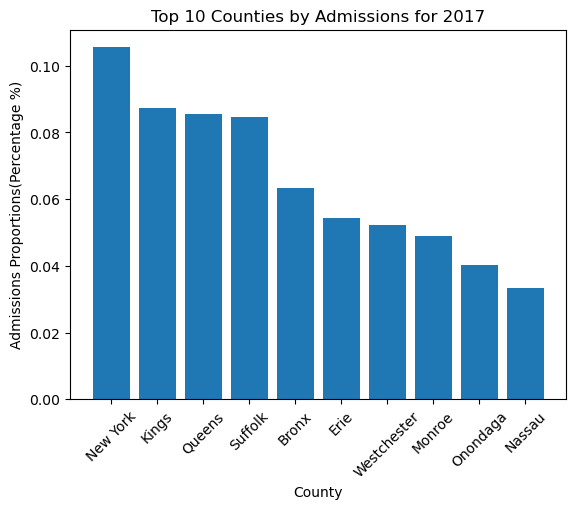

In [26]:
annualAdmissionsByCounty(programdata_df, 2017)

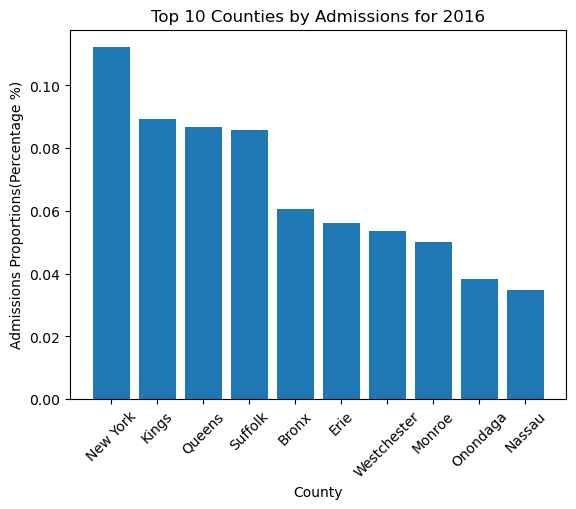

In [27]:
annualAdmissionsByCounty(programdata_df, 2016)

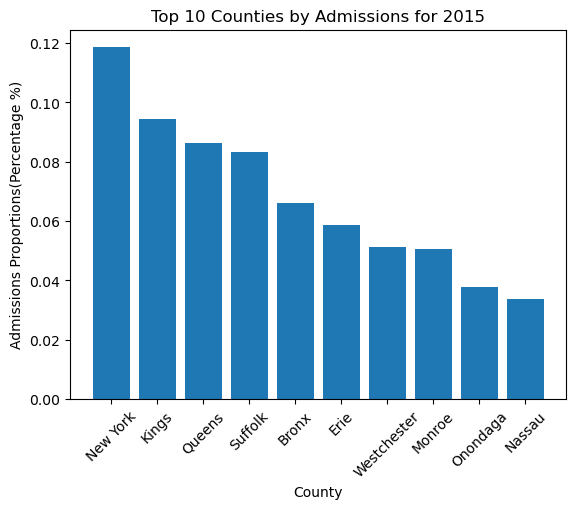

In [28]:
annualAdmissionsByCounty(programdata_df, 2015)

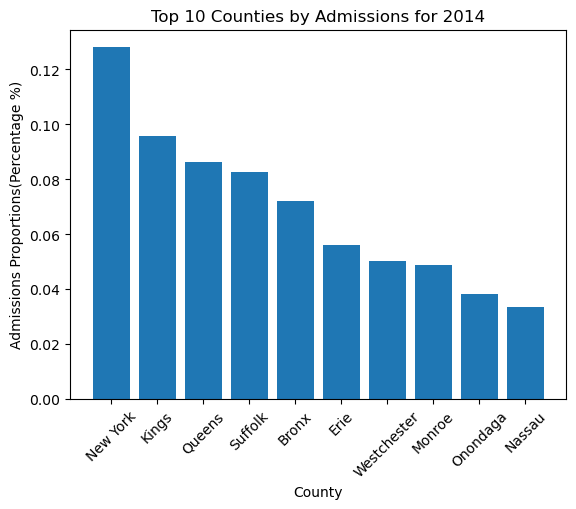

In [29]:
annualAdmissionsByCounty(programdata_df, 2014)

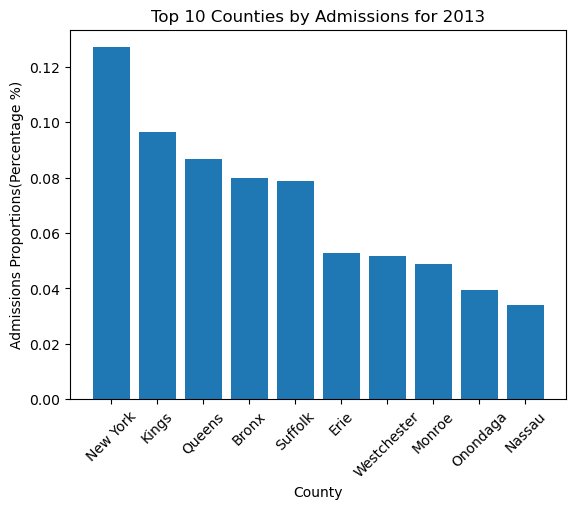

In [30]:
annualAdmissionsByCounty(programdata_df, 2013)

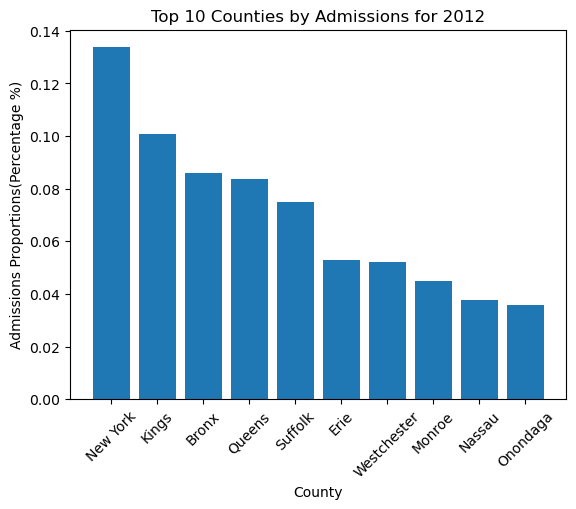

In [31]:
annualAdmissionsByCounty(programdata_df, 2012)

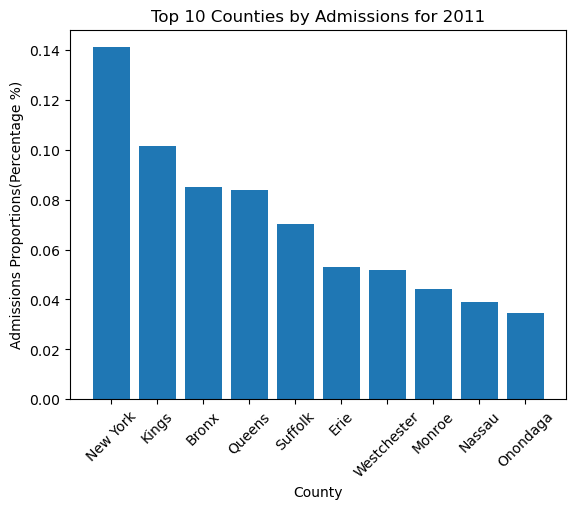

In [32]:
annualAdmissionsByCounty(programdata_df, 2011)

Based on the bar charts shown above, some patterns/trends that I observed over this period were that it was usually the same counties that were in the top 10, with a few occasional outliers. In addition, another pattern/trend that I saw was that the admission proportion max amounts went from 14 to 12 to 10, so the trend was that it decreased as time passed. 

## Question 6: 

(10 pts) Filter the data, and extract all admissions to the various “Rehab” facilities; i.e. you should perform a case-insensitive match for all facilities that include the word rehab, /
rehabilitation, etc. Using the filtered data, identify which substance is the most prominent among each age group. Visualize and explain the results.


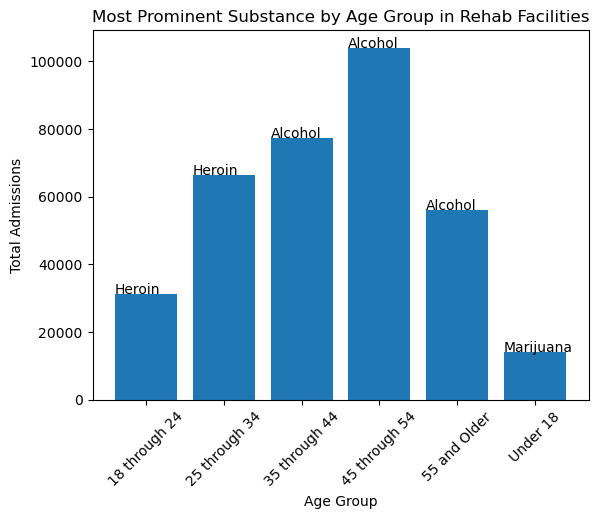

In [35]:
rehabinfo_df = programdata_df[programdata_df['Service Type'].str.contains("rehab | rehabilitation", case=False)]

age_substance_df = rehabinfo_df.groupby(['Age Group', 'Primary Substance Group'], observed = False)['Admissions'].sum().reset_index()

admissions_max = age_substance_df.groupby('Age Group', observed = False)['Admissions'].idxmax()
top_substance_by_age = age_substance_df.loc[admissions_max].sort_values('Age Group')

def plot_by_age_substance(df):
    
    sorted_df = df.sort_values('Age Group')
    
    bars = plt.bar(sorted_df['Age Group'], sorted_df['Admissions'])
    plt.title("Most Prominent Substance by Age Group in Rehab Facilities")
    plt.xlabel("Age Group")
    plt.ylabel("Total Admissions")

    for bar, substance in zip(bars, sorted_df['Primary Substance Group']):
        plt.text(bar.get_x(), bar.get_height(), substance)

    plt.xticks(rotation=45)
    plt.show()

plot_by_age_substance(top_substance_by_age)

## Question 7: 

(10 pts) Using the filtered “rehab” data from Question 6, conduct a detailed analysis to identify patterns in admissions to rehabilitation facilities across 7 counties. For example, are admissions for certain substance groups more prevalent etc. Provide a comprehensive explanation of your observations with supporting visualizations.


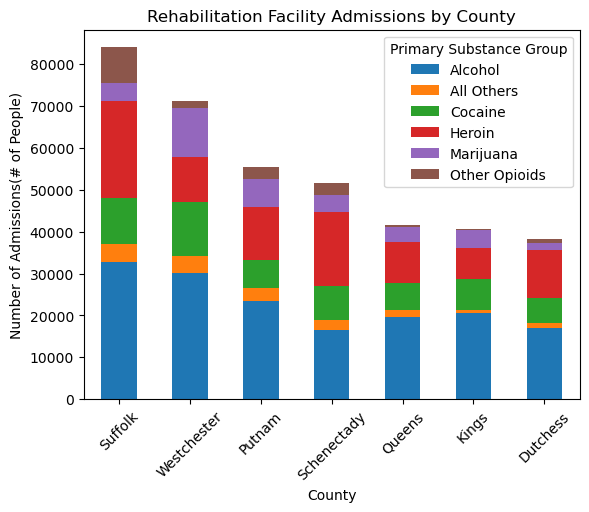

In [37]:
group_county_substance = (rehabinfo_df.groupby(['County of Program Location', 'Primary Substance Group'], observed = False)['Admissions'].sum().reset_index()) # group this data by county and substance

county_substance_pivot = group_county_substance.pivot(index='County of Program Location', columns='Primary Substance Group', values='Admissions').fillna(0) # convert data into pivot table

county_substance_pivot['Total'] = county_substance_pivot.sum(axis=1) # get sum of all admissions
county_substance_pivot.sort_values('Total', ascending=False, inplace=True) # sort values from high to low

top_seven_counties = county_substance_pivot.head(7).copy() # get top seven counties in terms of admissions
top_seven_counties.drop(columns='Total', inplace=True) # get rid of the total group

ax = top_seven_counties.plot(kind='bar', stacked=True) # stack the substances in one bar

plt.title("Rehabilitation Facility Admissions by County")
plt.xlabel("County")
plt.ylabel("Number of Admissions(# of People)")
plt.xticks(rotation=45)
plt.show()

Based on the bar chart above, alcohol is the main substance for admissions to rehabilitation facilities in most counties. Next is Heroin, and third seems to be cocaine. The clear leader in admissions is Suffolk, followed by Westchester, Putnam and the others. Another observation that I made was that most counties have alcohol as the clear leader in substance. However, Schenectady has more admissions from Heroin than Alcohol. 

## Question 8: 

(5 pts)[optional/bonus] Create any (1) visualization of your choice to demonstrate something interesting about the data. Ensure that you explain what you will demonstrate and the results.


The visualization that I chose was Annual Admissions by Age. In other words, the charts that I provide below will show the amount of people admitted sorted by age group. I thought it was interesting to be able to see the pattern in admissions based on age group and a given year. 

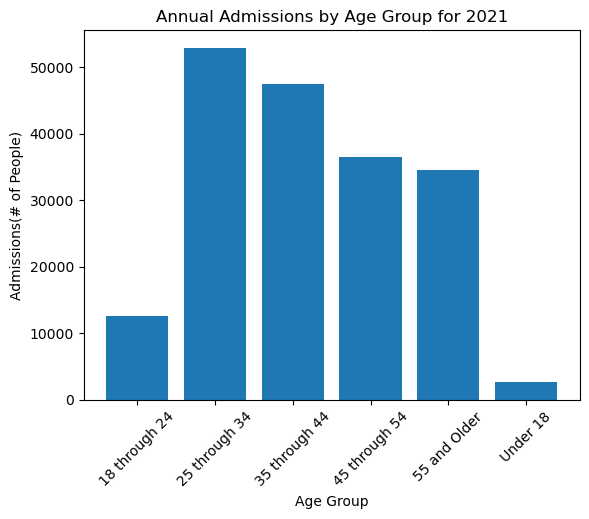

In [41]:
def annualAdmissionsByAge(df, year): 
    year_data = df[df['Year'] == year] # gets the data for the provided year
    age_totals = year_data.groupby('Age Group', observed=False)['Admissions'].sum() # gets the totals for each age for provided year
    
    plt.bar(age_totals.index, age_totals.values)
    plt.title(f'Annual Admissions by Age Group for {year}')
    plt.xlabel('Age Group')
    plt.ylabel('Admissions(# of People)')
    plt.xticks(rotation=45)
    plt.show()

annualAdmissionsByAge(programdata_df, 2021)

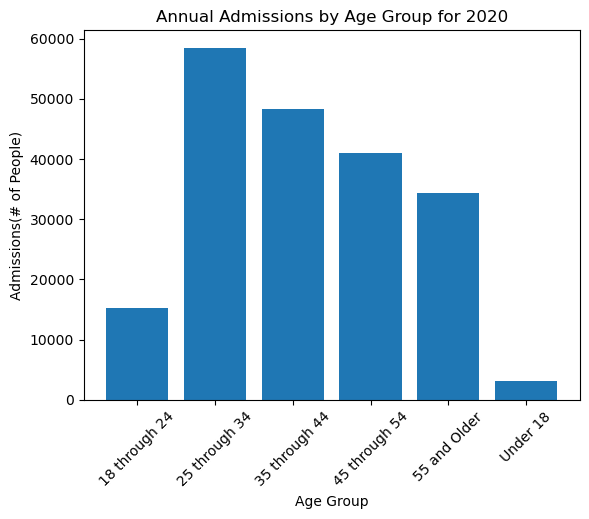

In [42]:
annualAdmissionsByAge(programdata_df, 2020)

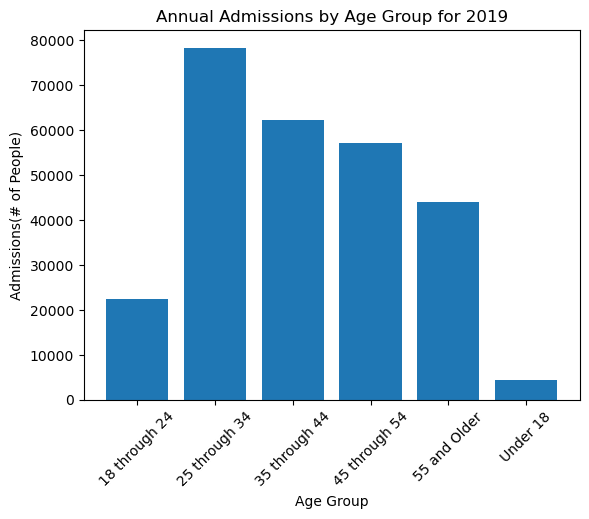

In [43]:
annualAdmissionsByAge(programdata_df, 2019)

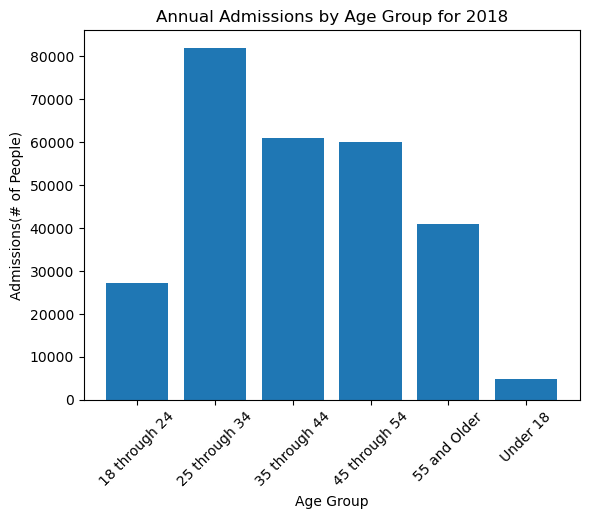

In [44]:
annualAdmissionsByAge(programdata_df, 2018)

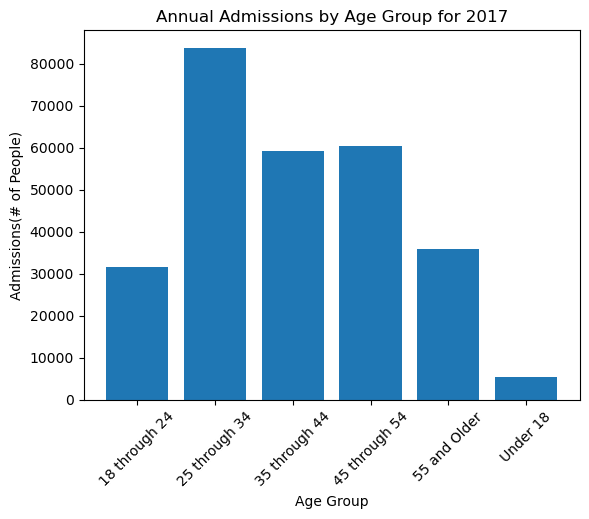

In [45]:
annualAdmissionsByAge(programdata_df, 2017)

Based on the bar charts shown above, the trend is that as age increases, the # of admissions also increases up until the age group 25 through 34. After the age group 25 through 34, it begins to decrease until the end, the oldest age group, 55 and older. Another observation that I made was that from 2019 to 2021, the decrease from 25 through 34 to 45 through 54 almost looks like a staircase. However, in years 2017 and 2018, 35 through 44 and 45 through 54 stay at roughly the same # of admissions. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.


https://stackoverflow.com/questions/26700598/matplotlib-showing-x-tick-labels-overlapping # used to fix overlapping x-axis labels

https://stackoverflow.com/questions/11391969/how-to-group-pandas-dataframe-entries-by-date-in-a-non-unique-column # used to figure out how to group by year for question 4

https://stackoverflow.com/questions/46562479/python-pandas-data-frame-creation # used to figure out how to create a df manually